# Input-output properties cells

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rootFolder = '/home/fernando/S1_netpyne/sim/'
# rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('cell_data/')
folder = sorted(folder)

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/S1_netpyne/sim/


In [3]:
!nrnivmodl mod

/home/fernando/S1_netpyne/sim
Mod files: "mod/cadad.mod" "mod/CaDynamics_E2.mod" "mod/Ca_HVA.mod" "mod/Ca_LVAst.mod" "mod/Ca.mod" "mod/DetAMPANMDA.mod" "mod/DetGABAAB.mod" "mod/HH2.mod" "mod/htc.mod" "mod/Ih.mod" "mod/Im.mod" "mod/IT2.mod" "mod/IT.mod" "mod/KdShu2007.mod" "mod/kl.mod" "mod/K_Pst.mod" "mod/K_Tst.mod" "mod/MyExp2SynBB.mod" "mod/MyExp2SynNMDABB.mod" "mod/Nap_Et2.mod" "mod/NaTa_t.mod" "mod/NaTs2_t.mod" "mod/ProbAMPANMDA_EMS.mod" "mod/ProbGABAAB_EMS.mod" "mod/SK_E2.mod" "mod/SKv3_1.mod" "mod/StochKv_deterministic.mod" "mod/StochKv.mod" "mod/tia.mod" "mod/vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-sona

In [4]:
def loadTemplateName(cellnumber):     
    f = open(outFolder+'/template.hoc', 'r')
    for line in f.readlines():
        if 'begintemplate' in line:
            templatename = str(line)     
    templatename=templatename[:-1]        
    templatename=templatename[14:]
    return templatename

## Netpyne

In [5]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters
netParams.scaleConnWeight = 0.001 # weight conversion factor (from nS to uS)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [6]:
%matplotlib inline

In [7]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = 4000.0 						            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = False							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.1 			
cfg.printRunTime = 0.1 # in sec			

cfg.seeds = {'conn': 1234, 'stim': 1234, 'loc': 1234} 
cfg.hParams = {'celsius': 34, 'v_init': -65.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.filename = 'model_output_2exp'  			# Set file output name
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = False			
cfg.saveCellConns = True	
cfg.saveTiming = False


cfg.analysis['plotTraces'] = {'include': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [2300,3600], 'saveFig': True, 'showFig': True, 'figSize':(12,4)} # Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre': [0],'includePre': [0], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}


In [8]:
#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------
#StochKv_deterministic.mod
for cellnumber in [265,266,267,268,269]:
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'cellName': cellName, 'cellTemplateName': cellTemplateName})

NEURON: morphology_5ecbf9b163 : a template cannot be redefined
 in morphology.hoc near line 34
 begintemplate morphology_5ecbf9b163
                                   ^
        xopen("morphology.hoc")
      execute1("{xopen("mo...")
    load_file("morphology.hoc")
  xopen("template.hoc")
NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")
      execute1("{xopen("bi...")
    load_file("biophysics.hoc")
  xopen("template.hoc")
NEURON: synapses_5ecbf9b163 : a template cannot be redefined
 in synapses.hoc near line 31
 begintemplate synapses_5ecbf9b163                
                                 ^
        xopen("synapses.hoc")
      execute1("{xopen("sy...")
    load_file("synapses/s...")
  xopen("template.hoc")


	0 
	0 
	0 
cADpyr229_L23_PC_5ecbf9b163[0]


NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")
NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")


	1 
	1 
	1 
cADpyr229_L23_PC_8ef1aa6602[0]
	1 
	1 
	1 


NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")


cADpyr229_L23_PC_863902f300[0]
	1 
	1 
	1 
cADpyr229_L23_PC_c292d67a2e[0]
	1 
	1 
	1 


NEURON: cADpyr229_biophys : a template cannot be redefined
 in biophysics.hoc near line 33
 begintemplate cADpyr229_biophys
                               ^
        xopen("biophysics.hoc")


cADpyr229_L23_PC_c2e79db05a[0]


In [9]:
for cellnumber in [265,266,267,268,269]:
    # ---------------------------------------------------------------------------------------------------- #
    cellName = folder[cellnumber]
    outFolder = rootFolder+'/cell_data/'+folder[cellnumber]
    cellTemplateName = loadTemplateName(cellnumber)
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')
    
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
        if 'soma_0' in netParams.cellParams[cellName]['secLists'][secname2]:
            print(cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][0])
            netParams.cellParams[cellName]['secLists'][secname2][0] = 'soma'
    # ---------------------------------------------------------------------------------------------------- #
    
    nonSpiny = ['axon_0', 'axon_1']
    netParams.cellParams[cellName]['secLists']['spiny'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpiny]
    nonSpinyEE = ['axon_0', 'axon_1', 'soma']
    netParams.cellParams[cellName]['secLists']['spinyEE'] = [sec for sec in netParams.cellParams[cellName]['secLists']['all'] if sec not in nonSpinyEE]    
    
    # ---------------------------------------------------------------------------------------------------- #
    netParams.popParams[cellName] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

L23_PC_cADpyr229_1 all soma_0
L23_PC_cADpyr229_1 somatic soma_0
L23_PC_cADpyr229_2 all soma_0
L23_PC_cADpyr229_2 somatic soma_0
L23_PC_cADpyr229_3 all soma_0
L23_PC_cADpyr229_3 somatic soma_0
L23_PC_cADpyr229_4 all soma_0
L23_PC_cADpyr229_4 somatic soma_0
L23_PC_cADpyr229_5 all soma_0
L23_PC_cADpyr229_5 somatic soma_0


In [10]:
for cellnumber in [265,266,267,268,269]:
    cellName = folder[cellnumber]
    netParams.popParams[cellName+'b'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

for cellnumber in [265,266,267,268,269]:
    cellName = folder[cellnumber]
    netParams.popParams[cellName+'c'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}
    
for cellnumber in [265,266,267,268,269]:
    cellName = folder[cellnumber]
    netParams.popParams[cellName+'d'] = {'cellType': cellName, 'numCells': 1, 'cellModel': 'HH_full'}

In [11]:
netParams.cellParams[cellName]['secLists'].keys()

dict_keys(['SectionList[0]', 'SectionList[1]', 'all', 'somatic', 'basal', 'apical', 'axonal', 'spiny', 'spinyEE'])

In [12]:
# create custom list of spike times
spkTimes = [2500,3500]

netParams.popParams['presyn'] = {'cellModel': 'VecStim', 'numCells': 1, 'spkTimes': spkTimes}  # VecStim with spike times

In [13]:
netParams.cellParams.keys()

odict_keys(['L23_PC_cADpyr229_1', 'L23_PC_cADpyr229_2', 'L23_PC_cADpyr229_3', 'L23_PC_cADpyr229_4', 'L23_PC_cADpyr229_5'])

In [14]:
netParams.popParams.keys()

odict_keys(['L23_PC_cADpyr229_1', 'L23_PC_cADpyr229_2', 'L23_PC_cADpyr229_3', 'L23_PC_cADpyr229_4', 'L23_PC_cADpyr229_5', 'L23_PC_cADpyr229_1b', 'L23_PC_cADpyr229_2b', 'L23_PC_cADpyr229_3b', 'L23_PC_cADpyr229_4b', 'L23_PC_cADpyr229_5b', 'L23_PC_cADpyr229_1c', 'L23_PC_cADpyr229_2c', 'L23_PC_cADpyr229_3c', 'L23_PC_cADpyr229_4c', 'L23_PC_cADpyr229_5c', 'L23_PC_cADpyr229_1d', 'L23_PC_cADpyr229_2d', 'L23_PC_cADpyr229_3d', 'L23_PC_cADpyr229_4d', 'L23_PC_cADpyr229_5d', 'presyn'])

In [15]:
#------------------------------------------------------------------------------
# Synaptic mechanism parameters  - mods from M1 detailed
#------------------------------------------------------------------------------
## S1
netParams.synMechParams['AMPA'] = {'mod':'MyExp2SynBB', 'tau1': 0.2, 'tau2': 1.74, 'e': 0}
netParams.synMechParams['NMDA'] = {'mod': 'MyExp2SynNMDABB', 'tau1NMDA': 0.29, 'tau2NMDA': 43, 'e': 0, 'r': 0.8}

ESynMech = ['AMPA', 'NMDA']


In [16]:
## Cell connectivity rules
netParams.connParams['pre->post'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': ['L23_PC_cADpyr229_1', 'L23_PC_cADpyr229_2', 'L23_PC_cADpyr229_3', 'L23_PC_cADpyr229_4', 'L23_PC_cADpyr229_5']},
        'sec': 'spinyEE',                  # target postsyn section
        'synMech': ESynMech,              # target synaptic mechanism
        'weight': 0.46*0.68,                 # synaptic weight
        'synsPerConn': 3,
        'delay': 0.5}             # probability of connection

In [17]:
## Cell connectivity rules
netParams.connParams['pre->post2'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': ['L23_PC_cADpyr229_1b', 'L23_PC_cADpyr229_2b', 'L23_PC_cADpyr229_3b', 'L23_PC_cADpyr229_4b', 'L23_PC_cADpyr229_5b']},
        'sec': 'apical',                  # target postsyn section
        'synMech': ESynMech,              # target synaptic mechanism
        'weight': 0.46*0.68,                 # synaptic weight 
        'synsPerConn': 3,
        'delay': 0.5}   

## Cell connectivity rules
netParams.connParams['pre->post3'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': ['L23_PC_cADpyr229_1c', 'L23_PC_cADpyr229_2c', 'L23_PC_cADpyr229_3c', 'L23_PC_cADpyr229_4c', 'L23_PC_cADpyr229_5c']},
        'sec': 'spiny',                  # target postsyn section
        'synMech': ESynMech,              # target synaptic mechanism
        'weight': 0.46*0.68,                 # synaptic weight 
        'synsPerConn': 3,
        'delay': 0.5}   

## Cell connectivity rules
netParams.connParams['pre->post4'] = { 
        'preConds': {'pop': 'presyn'},
        'postConds': {'pop': ['L23_PC_cADpyr229_1d', 'L23_PC_cADpyr229_2d', 'L23_PC_cADpyr229_3d', 'L23_PC_cADpyr229_4d', 'L23_PC_cADpyr229_5d']},
        'sec': 'basal',                  # target postsyn section
        'synMech': ESynMech,              # target synaptic mechanism
        'weight': 0.46*0.68,                 # synaptic weight 
        'synsPerConn': 3,
        'delay': 0.5}   

In [18]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2021-09-29 19:54:27.828854

Creating network of 21 cell populations on 1 hosts...
  Number of cells on node 0: 21 
  Done; cell creation time = 0.37 s.
Making connections...
  Number of connections on node 0: 20 
  Number of synaptic contacts on node 0: 120 
  Done; cell connection time = 0.01 s.
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 20 traces of 1 types on node 0


{spkt: Vector[9521], spkid: Vector[9522], V_soma: {cell_0: Vector[9523], cell_1: Vector[9524], cell_2: Vector[9525], cell_3: Vector[9526], cell_4: Vector[9527], cell_5: Vector[9528], cell_6: Vector[9529], cell_7: Vector[9530], cell_8: Vector[9531], cell_9: Vector[9532], cell_10: Vector[9533], cell_11: Vector[9534], cell_12: Vector[9535], cell_13: Vector[9536], cell_14: Vector[9537], cell_15: Vector[9538], cell_16: Vector[9539], cell_17: Vector[9540], cell_18: Vector[9541], cell_19: Vector[9542]}, t: Vector[9543], _repr_mimebundle_: {}}

In [19]:
sim.runSim()                      			# run parallel Neuron simulation  

0.0s

Running simulation for 4000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
1.3s
1.4s
1.5s
1.6s
1.7s
1.8s
1.9s
2.0s
2.1s
2.2s
2.3s
2.4s
2.5s
2.6s
2.7s
2.8s
2.9s
3.0s
3.1s
3.2s
3.3s
3.4s
3.5s
3.6s
3.7s
3.8s
3.9s
4.0s
  Done; run time = 591.08 s; real-time ratio: 0.01.



Gathering data...
  Done; gather time = 0.03 s.

Analyzing...
  Cells: 21
  Connections: 20 (0.95 per cell)
  Synaptic contacts: 120 (5.71 per cell)
  Spikes: 2 (0.02 Hz)
  Simulated time: 4.0 s; 1 workers
  Run time: 591.08 s
  Done; saving time = 0.01 s.
Plotting recorded cell traces ... trace


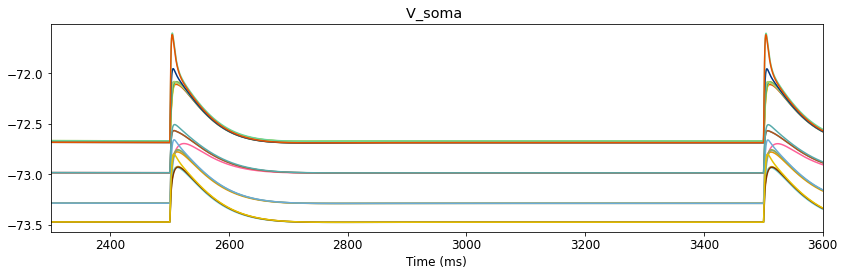

  Done; plotting time = 0.35 s

Total time = 591.87 s

End time:  2021-09-29 20:04:19.702070


In [20]:
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Plotting raster...


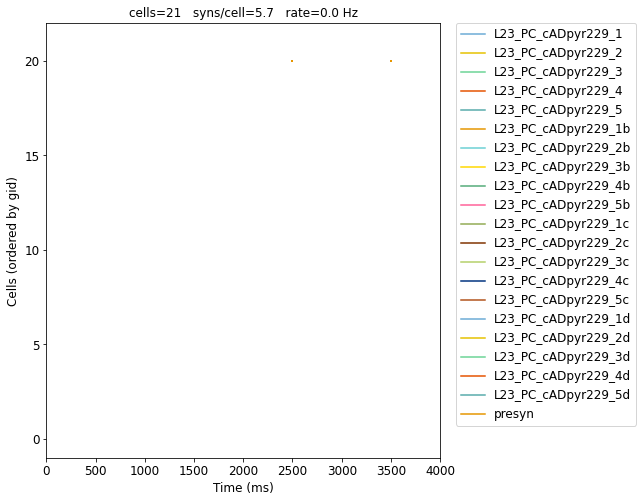

(<Figure size 720x576 with 1 Axes>,
 {'include': ['allCells'],
  'spkts': [2500.0, 3500.0],
  'spkinds': [20, 20],
  'timeRange': [0, 4000.0]})

In [21]:
sim.analysis.plotRaster()

Plotting recorded cell traces ... trace
Saving figure data as ../info/test/syn/syn_eletrophys_L23_PC:L23_PC_2exp.json ... 


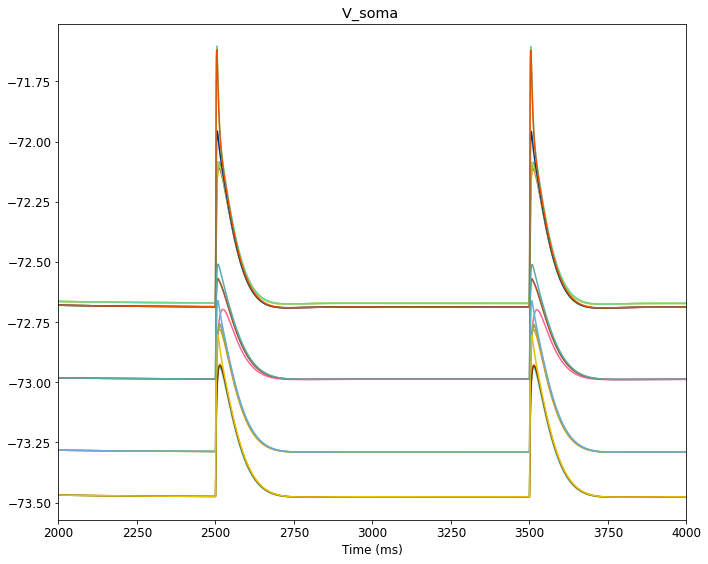

In [22]:
Traces2 = sim.analysis.plotTraces(oneFigPer='trace', overlay=1, timeRange=[2000,4000], saveData='../info/test/syn/syn_eletrophys_L23_PC:L23_PC_2exp.json')

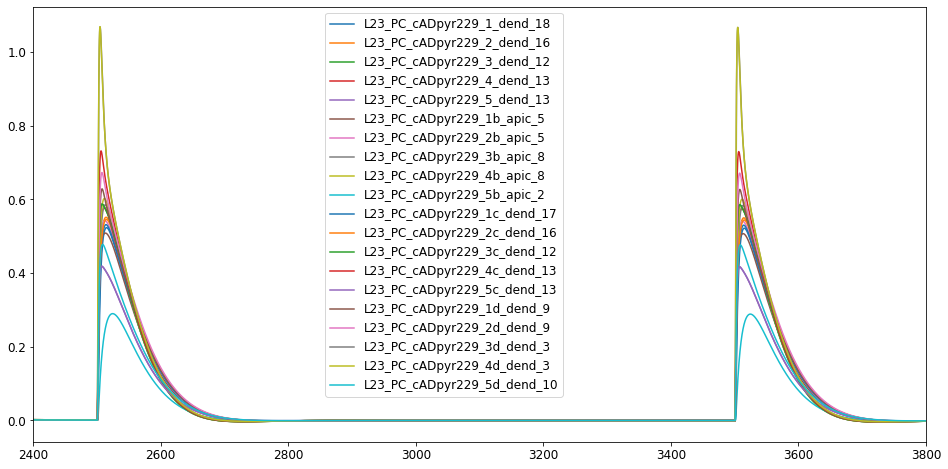

In [24]:
figSize = (16,8)
fig = plt.figure(figsize=figSize)  # Open a new figure
for number in range(20):
#     if 'apic' in sim.net.allCells[number]['conns'][0]['sec']:
    plt.plot(Traces2[1]['tracesData'][number]['t'][1:],Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma']-Traces2[1]['tracesData'][number]['cell_'+str(number)+'_V_soma'][9999], label= sim.net.allCells[number]['tags']['pop'] + '_' + sim.net.allCells[number]['conns'][0]['sec'])

plt.legend(loc='upper right', bbox_to_anchor=(0.6, 1.0))
plt.xlim(2400,3800)

plt.savefig('../info/test/syn/syn_eletrophys_L23_PC:L23_PC_2exp_Use0.46.png', facecolor = 'white' , dpi=300)
 